Load all packages you need.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import combinations
from sklearn.model_selection import train_test_split, KFold
from sklearn.utils import resample

%pip install minisom


  Using cached minisom-2.3.5.tar.gz (12 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=minisom-2.3.5-py3-none-any.whl size=12085 sha256=d8bc4d83ff48e59ee17b55eeb6a73a373e265f0ed41730d6d6447ab8ebb72d02
  Stored in directory: /Users/fyudris/Library/Caches/pip/wheels/76/b7/47/eb538cc16f29a1da8734d1548a0c19b642f92e46cd899eac33
Successfully built minisom
Note: you may need to restart the kernel to use updated packages.


Read the dataset that you prepared yesterday afternoon (without outlier and missing data). 

In [2]:
df = pd.read_csv('../data/diabetes_cleaned.csv')
print(df.columns.tolist())

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


Let's try SOM on Age and Pregnancies. Don't forget the the variables should be normalized!

To perform Self-Organizing Map (SOM) on the variables "Age" and "Pregnancies", you can follow these steps:
1. Normalize the variables.
2. Initialize and train the SOM.
3. Plot the neighborhood distance of the trained SOM.
3. Run K-Means on the nodes of the SOM.
4. Assign each data point to its Best Matching Unit (BMU)'s cluster label.
5. Plot the clusters on a scatterplot of "Age" vs "Pregnancies".

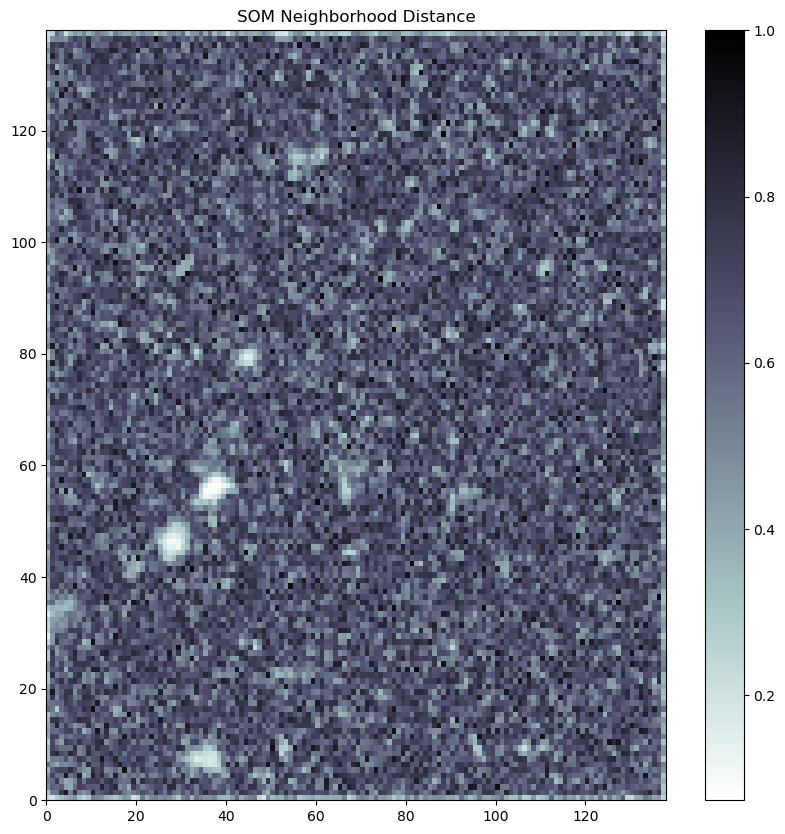

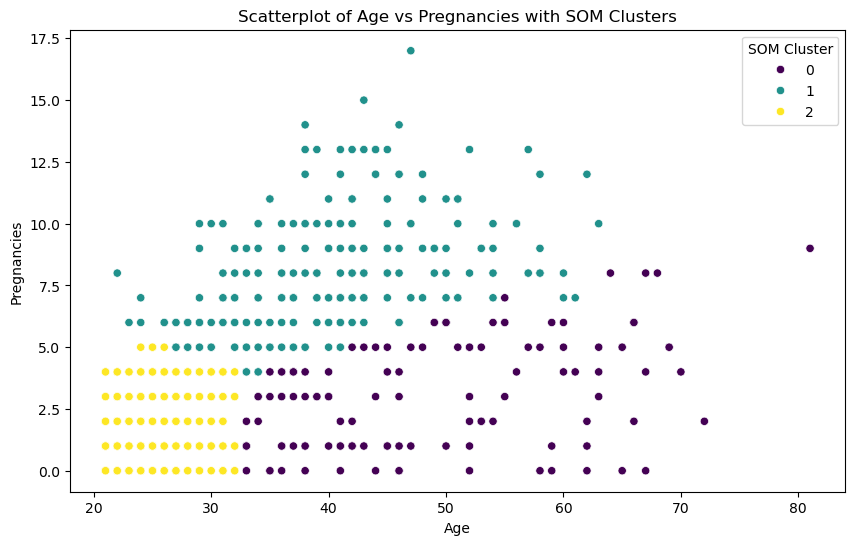

In [7]:
from sklearn.preprocessing import StandardScaler
from minisom import MiniSom
from sklearn.cluster import KMeans

# Normalize the variables
scaler = StandardScaler()
df[['Age_norm', 'Pregnancies_norm']] = scaler.fit_transform(df[['Age', 'Pregnancies']])

# Initialize the SOM
som_size = int(np.ceil(5 * np.sqrt(len(df))))
som = MiniSom(x=som_size, y=som_size, input_len=2, sigma=1.0, learning_rate=0.5, neighborhood_function='gaussian', random_seed=42)

# Train the SOM
som.train_random(df[['Age_norm', 'Pregnancies_norm']].values, 1000)

# Plot the neighborhood distance of the trained SOM
plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar()
plt.title('SOM Neighborhood Distance')
plt.show()

# Run K-Means on the nodes of the SOM
som_weights = som.get_weights().reshape(-1, 2)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(som_weights)
som_cluster_labels = kmeans.predict(som_weights)

# Assign each data point to its BMU's cluster label
bmu_indices = np.array([som.winner(x) for x in df[['Age_norm', 'Pregnancies_norm']].values])
bmu_indices_flat = np.ravel_multi_index(bmu_indices.T, (som_size, som_size))
df['SOM_Cluster'] = som_cluster_labels[bmu_indices_flat]

# Plot the clusters on a scatterplot of "Age" vs "Pregnancies"
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Pregnancies', hue='SOM_Cluster', palette='viridis', data=df)
plt.title('Scatterplot of Age vs Pregnancies with SOM Clusters')
plt.xlabel('Age')
plt.ylabel('Pregnancies')
plt.legend(title='SOM Cluster')
plt.show()

Perform the SOM algorithm (with minisom a well documented package is available on conda-forge). Tian, Azarian & Pecht (2014) suggest that a good estimation for the number of nodes in your map should be nodes = 5*sqrt(datapoints). Lets start with a 11x11 map structure and and define rectangular neighbourhood (only vertical and horizontal, no diagonal neighbours). Use a random seed for for reproducibility.  <br>
Step 1:Initialize your SOM. <br>
Stel 2: Train your SOM on 1000 iterations. <br>


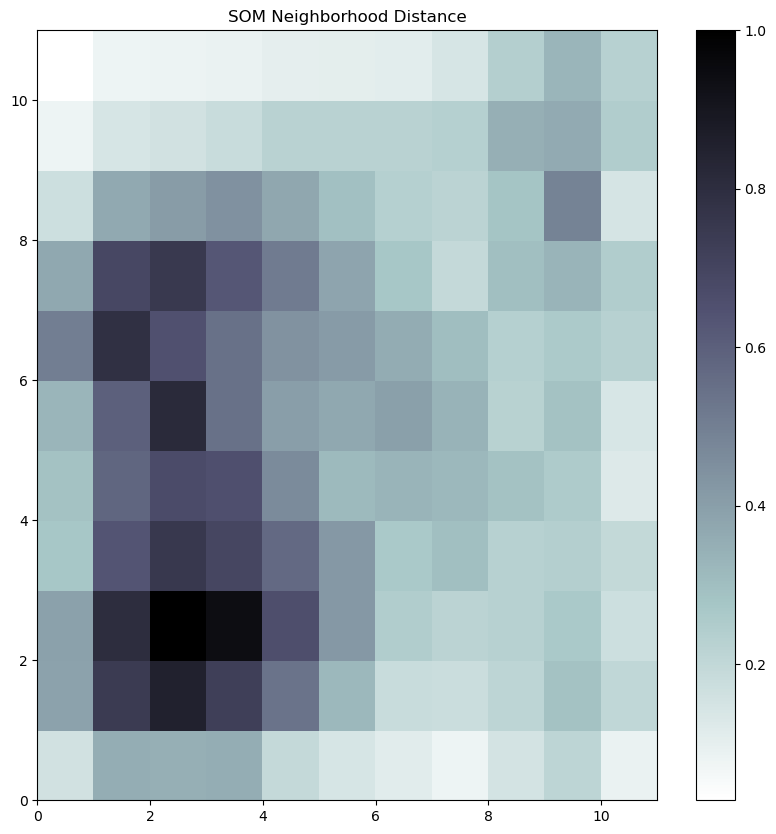

Cluster Labels for Data Points:
[2 1 0 1 0 1 0 2 2 0 2 2 2 0 1 0 1 1 1 2 2 0 2 2 2 1 2 0 2 1 1 0 2 0 2 2 1
 2 1 0 2 2 0 1 1 0 0 1 1 0 2 2 1 2 1 1 1 2 0 1 2 0 1 2 1 0 1 0 2 1 1 1 2 0
 1 1 1 1 0 1 0 1 2 1 2 1 1 0 2 2 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 2 1 1 0
 2 0 0 1 1 1 0 1 2 1 1 1 1 1 2 0 0 1 2 1 1 1 1 1 0 2 0 1 2 1 1 2 1 2 1 1 0
 2 1 2 0 1 1 1 2 0 2 1 1 1 0 1 0 0 1 0 0 1 1 1 0 2 1 2 0 0 1 1 0 0 2 2 1 0
 0 1 2 0 2 2 0 1 1 0 0 1 1 1 1 2 0 2 2 1 2 1 1 2 1 0 2 0 0 0 0 1 2 0 2 1 1
 1 1 1 1 2 1 0 1 0 2 1 0 1 1 1 1 0 1 2 2 1 0 1 2 1 1 1 2 1 1 1 1 2 0 1 1 2
 0 0 1 1 1 1 2 1 0 1 2 1 0 1 2 1 1 2 0 2 2 2 0 1 0 0 1 1 1 1 2 0 1 1 2 2 1
 1 0 0 0 1 2 1 1 1 0 1 1 1 2 1 1 1 1 2 0 1 1 2 1 1 1 2 1 0 1 1 2 1 1 1 0 0
 2 1 1 1 0 2 2 1 1 1 0 0 0 0 1 1 2 1 2 2 1 0 2 2 2 0 0 0 1 1 1 1 1 1 2 1 1
 0 1 1 1 1 1 1 1 0 2 2 1 1 0 1 0 0 0 1 1 1 0 2 0 2 0 1 0 1 2 1 0 1 1 1 1 1
 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 2 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 2
 1 2 2 0 2 2 2 1 2 0 2 1 1 1 2 0 1 1 1 2 1 2 1 0 2 2 0 1 0 1 1 1 1 2

In [10]:
# Load the normalized data
data = df[['Age_norm', 'Pregnancies_norm']].values

# Estimate the number of nodes
num_nodes = int(5 * np.sqrt(data.shape[0]))

# Initialize the SOM
som_size = 11  # 11x11 map structure
som = MiniSom(som_size, som_size, data.shape[1], sigma=1.0, learning_rate=0.5, neighborhood_function='gaussian', random_seed=42)

# Train the SOM on 1000 iterations
som.train_random(data, 1000)

# Plot the neighborhood distance of the trained SOM
plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar()
plt.title('SOM Neighborhood Distance')
plt.show()

# Run K-Means on the nodes of the SOM
som_weights = som.get_weights().reshape(-1, 2)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(som_weights)
som_cluster_labels = kmeans.predict(som_weights)

# Assign each data point to its BMU's cluster label
bmu_indices = np.array([som.winner(x) for x in data])
bmu_indices_flat = np.ravel_multi_index(bmu_indices.T, (som_size, som_size))
data_cluster_labels = som_cluster_labels[bmu_indices_flat]

# Print the cluster labels for the data points
print('Cluster Labels for Data Points:')
print(data_cluster_labels)

Step 3: Plot the neighbourdhood distance of your trained SOM. How many cluster do you detect?

Step 4: Run K-Means on the nodes of your SOM. <br>
Step 5: Assign each data point to it's BMU's cluster label.<br>
Step 6: Plot clusters on scatterplot of "Age" vs "Pregnancies". Compare the clusters with the clusters determined by the K-Means algorithm during the previous coding break. 